In [ ]:
import keras
import numpy
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import plotly.graph_objects as go
import os
from plotly.subplots import make_subplots
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D, Layer, Add, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import tensorflow as tf
%matplotlib inline

In [ ]:
df  = pd.read_csv('../../cleaneddataset2.csv')

In [ ]:
df

In [ ]:
df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']] = df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']].fillna(0)
df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']] = df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']].div(df[['Kelp', 'algae1', 'algae2', 'rock', 'unknown']].sum(axis=1), axis=0)
df

In [ ]:
df.columns

In [ ]:
df = df[(df['SiteName']=='Tuffin I') & (df['Depth(m)']==6) & (df['Diver']=='AB')]
df

In [ ]:
import re
def sorted_alphanumeric(data):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(data, key=alphanum_key)

In [8]:
path = "../../TuffinI_6mAB/"

dirlist = sorted_alphanumeric(os.listdir(path))
images = []
for j in sorted(dirlist):
    num = j.split('.jpg')[0]
    images.append(num)

sortimages = sorted_alphanumeric(images)
print(sortimages)
# dict1 = {}
# for k,l in enumerate(images):
#     if('-' in l):
#         first = int(l.split('-')[0])
#         if(first==0):
#             dict1[l] = [m for m in range(1,11)]
#         else:
#             before = first - 10
#             after = first + 10
#             list1 = [n for n in range(before, first)]
#             list2 = [o for o in range(first, after)]
#             list3 = list1 + list2
#             dict1[l] = list3
# sortdict = sorted_alphanumeric(dict1)
# print(sortdict)

['1196', '1197', '1198', '1199', '1200', '1201', '1202', '1203', '1204', '1205', '1206', '1207', '1208', '1209', '1210', '1211', '1212', '1213', '1214', '1215', '1216', '1217', '1218', '1219', '1220', '1221', '1222', '1223', '1224', '1225', '1226', '1227', '1228', '1229', '1230', '1231', '1232', '1233', '1234', '1235', '1236', '1237', '1238', '1239', '1240', '1241', '1242', '1243', '1244', '1245', '1246', '1247', '1248', '1249', '1250', '1251', '1252', '1253', '1254', '1255', '1256', '1257', '1258', '1259', '1260', '1261', '1262', '1263', '1264', '1265', '1266', '1267', '1268', '1269', '1270', '1271', '1272', '1273', '1274', '1275', '1276', '1277', '1278', '1279', '1280', '1281', '1282', '1283', '1284', '1285', '1286', '1287', '1288', '1289', '1290', '1291', '1292', '1293', '1294', '1295', '1296', '1297', '1298', '1299', '1300', '1301', '1302', '1303', '1304', '1305', '1306', '1307', '1308', '1309', '1310', '1311', '1312', '1313', '1314', '1315', '1316', '1317', '1318', '1319', '1320',

In [ ]:
test_image = []
test_labels = []
orig = []
scale_percent = 30
flag=[]

for p in tqdm(sortimages):
    if('-' in p):
        key = int(p.split('-')[1])
        df1 = df[df['ImageNumber']==key]

        if(len(df1)!=0):
            kelp= list(df1.loc[:, 'Kelp'])[0]
            algae1 = list(df1.loc[:, 'algae1'])[0]
            algae2 = list(df1.loc[:, 'algae2'])[0]
            rock = list(df1.loc[:, 'rock'])[0]
            unknown = list(df1.loc[:, 'unknown'])[0]
            labels = [kelp, algae1, algae2, rock, unknown]
            test_labels.append(labels)
            # flag.append(1)
        else:
            labels = 0
            test_labels.append(labels)
    else:
        test_labels.append(0)
    img1 = cv2.imread(path + p + '.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    orig.append(img1)
    width = int(img1.shape[1] * scale_percent / 100)
    height = int(img1.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized1 = cv2.resize(img1, dim)
    test_image.append(resized1)

    # key = int(p.split('-')[1])
    # df1 = df[df['ImageNumber']==key]
    #
    # if(len(df1)!=0):
    #     kelp= list(df1.loc[:, 'Kelp'])[0]
    #     algae1 = list(df1.loc[:, 'algae1'])[0]
    #     algae2 = list(df1.loc[:, 'algae2'])[0]
    #     rock = list(df1.loc[:, 'rock'])[0]
    #     unknown = list(df1.loc[:, 'unknown'])[0]
    #     labels = [kelp, algae1, algae2, rock, unknown]
    #     test_labels.append(labels)
    #     # flag.append(1)
    # else:
    #     labels = 0
    #     test_labels.append(labels)
    #     # flag.append(0)
    #
    # img1 = cv2.imread(path + p + '.jpg')
    # img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    # orig.append(img1)
    # width = int(img1.shape[1] * scale_percent / 100)
    # height = int(img1.shape[0] * scale_percent / 100)
    # dim = (width, height)
    # resized1 = cv2.resize(img1, dim)
    # test_image.append(resized1)
    #
    # for q in dict1[p]:
    #     img2 = cv2.imread(path + str(q) + '.jpg')
    #     img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    #     orig.append(img2)
    #     width2 = int(img2.shape[1] * scale_percent / 100)
    #     height2 = int(img2.shape[0] * scale_percent / 100)
    #     dim2 = (width2, height2)
    #     resized2 = cv2.resize(img2, dim2)
    #     test_image.append(resized2)
    #     test_labels.append(0)
        # flag.append(0)

    # if(key==i.ImageNumber):
    #     flag.ap


  8%|▊         | 1125/13404 [00:53<11:20, 18.04it/s]

In [11]:
class ResnetBlock(Model):
    def __init__(self, channels: int, down_sample=False):

        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)

        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        # if not perform down sample, then add a shortcut directly
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPooling2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out

In [12]:
model = ResNet18(5)
model.build(input_shape = (None, 456, 811, 3))
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd,loss=tf.keras.losses.KLDivergence(), metrics=['accuracy',tf.keras.metrics.AUC()])
model.load_weights('tuffin_test_30.ckpt')


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [58]:
def vconcat_resize(img_list, interpolation
                   = cv2.INTER_CUBIC):
      # take minimum width
    w_min = min(img.shape[1]
                for img in img_list)

    # resizing images
    im_list_resize = [cv2.resize(img,
                      (w_min, int(img.shape[0] * w_min / img.shape[1])),
                                 interpolation = interpolation)
                      for img in img_list]
    # return final image
    return cv2.vconcat(im_list_resize)

def hconcat_resize(img_list,
                   interpolation
                   = cv2.INTER_CUBIC):
      # take minimum hights
    h_min = min(img.shape[0]
                for img in img_list)

    # image resizing
    im_list_resize = [cv2.resize(img,
                       (int(img.shape[1] * h_min / img.shape[0]),
                        h_min), interpolation
                                 = interpolation)
                      for img in img_list]

    # return final image
    return cv2.hconcat(im_list_resize)
def concat_tile_resize(list_2d, interpolation = cv2.INTER_CUBIC):

    img_list_v = [hconcat_resize(list_h, interpolation = cv2.INTER_CUBIC) for list_h in list_2d]

    return vconcat_resize(img_list_v, interpolation=cv2.INTER_CUBIC)

In [24]:
len(test_labels)
# print(xaxi)
xax_time = [i for i in range(0,len(test_labels), 30)]
xax_time

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]

Final Video Template

1/1 [==============================] - 0s 95ms/step


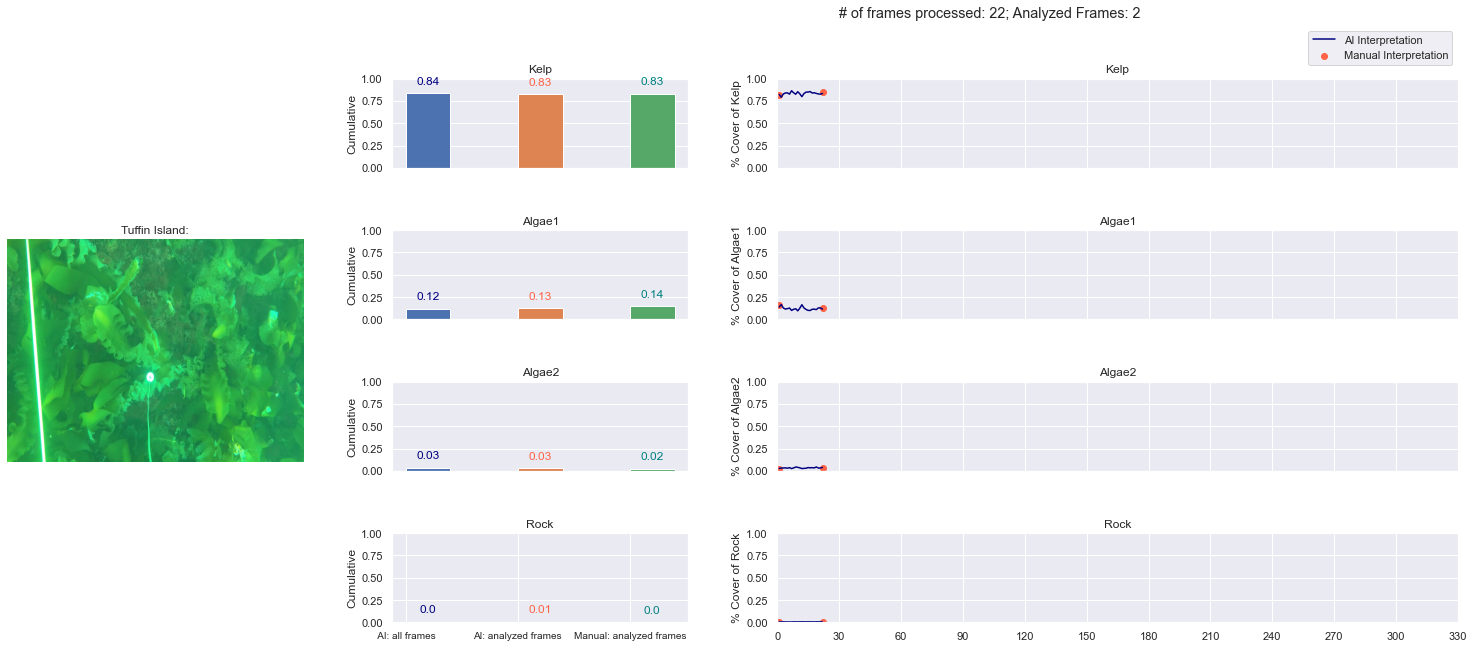

In [76]:
f1 = plt.figure(figsize=(26, 10))

xax = [' AI: all frames', 'AI: analyzed frames', 'Manual: analyzed frames']
X_axis = np.arange(3)

# xax_time = [i+1 for i in range(len(test_image))]
# xax_time = [i for i in range(0,360, 30)]
ax_2 = f1.add_subplot(4,4,2)
#ax_3.set_xticks([y for y in range(5)], labels=xax)
ax_2.set_ylabel('Cumulative')


ax_4 = f1.add_subplot(4,4,6)
#ax_3.set_xticks([y for y in range(5)], labels=xax)
ax_4.set_ylabel('Cumulative')

ax_6 = f1.add_subplot(4,4,10)
#ax_3.set_xticks([y for y in range(5)], labels=xax)
ax_6.set_ylabel('Cumulative')

ax_8 = f1.add_subplot(4,4,14)
#ax_3.set_xticks([y for y in range(5)], labels=xax)
ax_8.set_ylabel('Cumulative')

ax_3 = f1.add_subplot(4,4,(3,4))
ax_3.set_xticks(xax_time, labels=xax_time)
ax_3.set_ylabel('Percent cover of Kelp')


ax_5 = f1.add_subplot(4,4,(7,8))
ax_3.set_xticks(xax_time, labels=xax_time)
ax_5.set_ylabel('Percent cover of Algae 1')

ax_7 = f1.add_subplot(4,4,(11,12))
ax_3.set_xticks(xax_time, labels=xax_time)
ax_7.set_ylabel('Percent cover of Algae 2')

ax_9 = f1.add_subplot(4,4,(15,16))
ax_3.set_xticks(xax_time, labels=xax_time)
ax_9.set_ylabel('Percent cover of Rock')

ax_1 = f1.add_subplot(1,4,1)

subs = [ax_2, ax_4, ax_6, ax_8]
subs2 = [ax_3, ax_5, ax_7, ax_9]
plt.subplots_adjust(wspace= 0.30, hspace= 0.70)
f1.canvas.draw()
# f1 = plt.figure()
# plt.subplot(1, 2, 1)
# line1, = plt.plot(a)
# plt.subplot(1, 2, 2)
# line2, = plt.plot(a)
sum_cumul = [0.0,0.0,0.0,0.0]
sum_cumul_analyzed = [0.0,0.0,0.0,0.0]
sum_cumul_manual = [0.0,0.0,0.0,0.0]
cumul_analyzed = [0.0,0.0,0.0,0.0]
cumul_manual = [0.0,0.0,0.0,0.0]

kelp = []
a1 = []
a2 = []
rock = []
frames_list = []

kelp_manual = []
a1_manual = []
a2_manual = []
rock_manual = []
analyz_frames = []
manual_list=[[],[],[],[]]

count=0
video_name = 'finalvideo.avi'
video = cv2.VideoWriter(video_name, 0, 5.0, (1872, 720))
sns.set()
for ind, (i,j,o) in enumerate(zip(test_image, test_labels, orig)):
    X1 = np.array(i, dtype='float32')
    y = np.array(j, dtype='float32')
    X = X1 / 255.0

    classes = np.array(['Kelp', 'Algae1', 'Algae2', 'Rock'])
    proba = model.predict(X.reshape(1, 456, 811, 3))
    pred = list(proba[0][:-1])


    kelp.append(pred[0])
    a1.append(pred[1])
    a2.append(pred[2])
    rock.append(pred[3])
    frames_list.append(ind+1)

    pred_list = [kelp, a1, a2, rock]

    list1 = [pred, sum_cumul]
    sum_cumul = [round(sum(k),3) for k in zip(*list1)]
    cumul = [round(l/(ind+1), 3) for l in sum_cumul]


    o = cv2.resize(o, (1600, 1200))

    ax_1.clear()
    ax_1.axis('off')
    ax_1.set_title('Tuffin Island:')
    ax_1.imshow(o)

    if(j!=0):
        dist = j[:-1]
        kelp_manual.append(dist[0])
        a1_manual.append(dist[1])
        a2_manual.append(dist[2])
        rock_manual.append(dist[3])
        manual_list = [kelp_manual, a1_manual, a2_manual, rock_manual]

        count+=1
        analyz_frames.append(ind+1)
        proba2 = model.predict(X.reshape(1, 456, 811, 3))
        pred_analyzed = list(proba2[0][:-1])

        list3 = [pred_analyzed, sum_cumul_analyzed]
        sum_cumul_analyzed = [round(sum(o),3) for o in zip(*list3)]
        cumul_analyzed = [round(p/count, 3) for p in sum_cumul_analyzed]


        list2 = [j, sum_cumul_manual]
        sum_cumul_manual = [round(sum(m),3) for m in zip(*list2)]
        cumul_manual = [round(n/count, 3) for n in sum_cumul_manual]

    frames = ind + 1


    for label2, (sub2,cl2,p,m) in enumerate(zip(subs2, classes, pred_list, manual_list)):

        sub2.clear()
        sub2.plot(frames_list, p, c='navy', label='AI Interpretation')
        sub2.scatter(analyz_frames, m, c='tomato', label='Manual Interpretation')
        sub2.set_ylabel("% Cover of "+ cl2)
        sub2.set_ylim([0,1])
        sub2.set_title(cl2)

    ax_3.set_xticks(xax_time, labels=[])
    ax_5.set_xticks(xax_time, labels=[])
    ax_7.set_xticks(xax_time, labels=[])
    sub2.set_xticks(xax_time, labels=xax_time)
    sub2.set_xlabel('Time(seconds)')

    for label, (sub,cl) in enumerate(zip(subs, classes)):

        sub.clear()
        sub.bar(X_axis[0]+0.2, cumul[label], 0.4)
        sub.bar(X_axis[1]+0.2, cumul_analyzed[label], 0.4)
        sub.bar(X_axis[2]+0.2, cumul_manual[label], 0.4)

        sub.set_ylabel('Cumulative')
        sub.set_ylim([0,1])
        sub.set_title(cl)
        sub.text(X_axis[0]+0.2, cumul[label]+0.1, str(round(cumul[label], 2)), horizontalalignment='center', color='navy')
        sub.text(X_axis[1]+0.2, cumul_analyzed[label]+0.1, str(round(cumul_analyzed[label], 2)), horizontalalignment='center', color='tomato')
        sub.text(X_axis[2]+0.2, cumul_manual[label]+0.1, str(round(cumul_manual[label], 2)), horizontalalignment='center', color='teal')

    ax_2.set_xticks([])
    ax_4.set_xticks([])
    ax_6.set_xticks([])
    sub.set_xticks([y for y in range(3)], labels=xax)#, rotation=45, ha='right')
    sub.tick_params(axis='x', labelsize=10)

    f1.suptitle('# of frames processed: '+str(frames) +"; Analyzed Frames: "+str(count), x=0.65)
    ax_3.legend(bbox_to_anchor=(1, 1.6))
    # ax_3.legend(bbox_to_anchor=(0, 1.6))


    f1.canvas.draw()
    img = np.frombuffer(f1.canvas.tostring_rgb(), dtype=np.uint8)
    img  = img.reshape(f1.canvas.get_width_height()[::-1] + (3,))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

    # print(img.shape)

    cv2.imshow('frames', img)


    video.write(img)

    k = cv2.waitKey(33) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
video.release()

Radial Graph Template

1/1 [==============================] - 0s 436ms/step
Cumul [0.438, 0.233, 0.211, 0.112, 0.006, 0.438]
(1080, 1872, 3)
1/1 [==============================] - 0s 41ms/step
Cumul [0.422, 0.264, 0.19, 0.118, 0.006, 0.422]
(1080, 1872, 3)
1/1 [==============================] - 0s 48ms/step
Cumul [0.429, 0.251, 0.194, 0.118, 0.007, 0.429]
(1080, 1872, 3)
1/1 [==============================] - 0s 47ms/step
Cumul [0.444, 0.274, 0.173, 0.102, 0.007, 0.444]
(1080, 1872, 3)
1/1 [==============================] - 0s 44ms/step
Cumul [0.445, 0.287, 0.169, 0.093, 0.007, 0.445]
(1080, 1872, 3)
1/1 [==============================] - 0s 48ms/step
Cumul [0.454, 0.27, 0.178, 0.091, 0.007, 0.454]
(1080, 1872, 3)
1/1 [==============================] - 0s 44ms/step
Cumul [0.472, 0.251, 0.179, 0.092, 0.006, 0.472]
(1080, 1872, 3)
1/1 [==============================] - 0s 45ms/step
Cumul [0.48, 0.255, 0.171, 0.088, 0.006, 0.48]
(1080, 1872, 3)
1/1 [==============================] - 0s 38ms/step
Cumul [0.485, 0

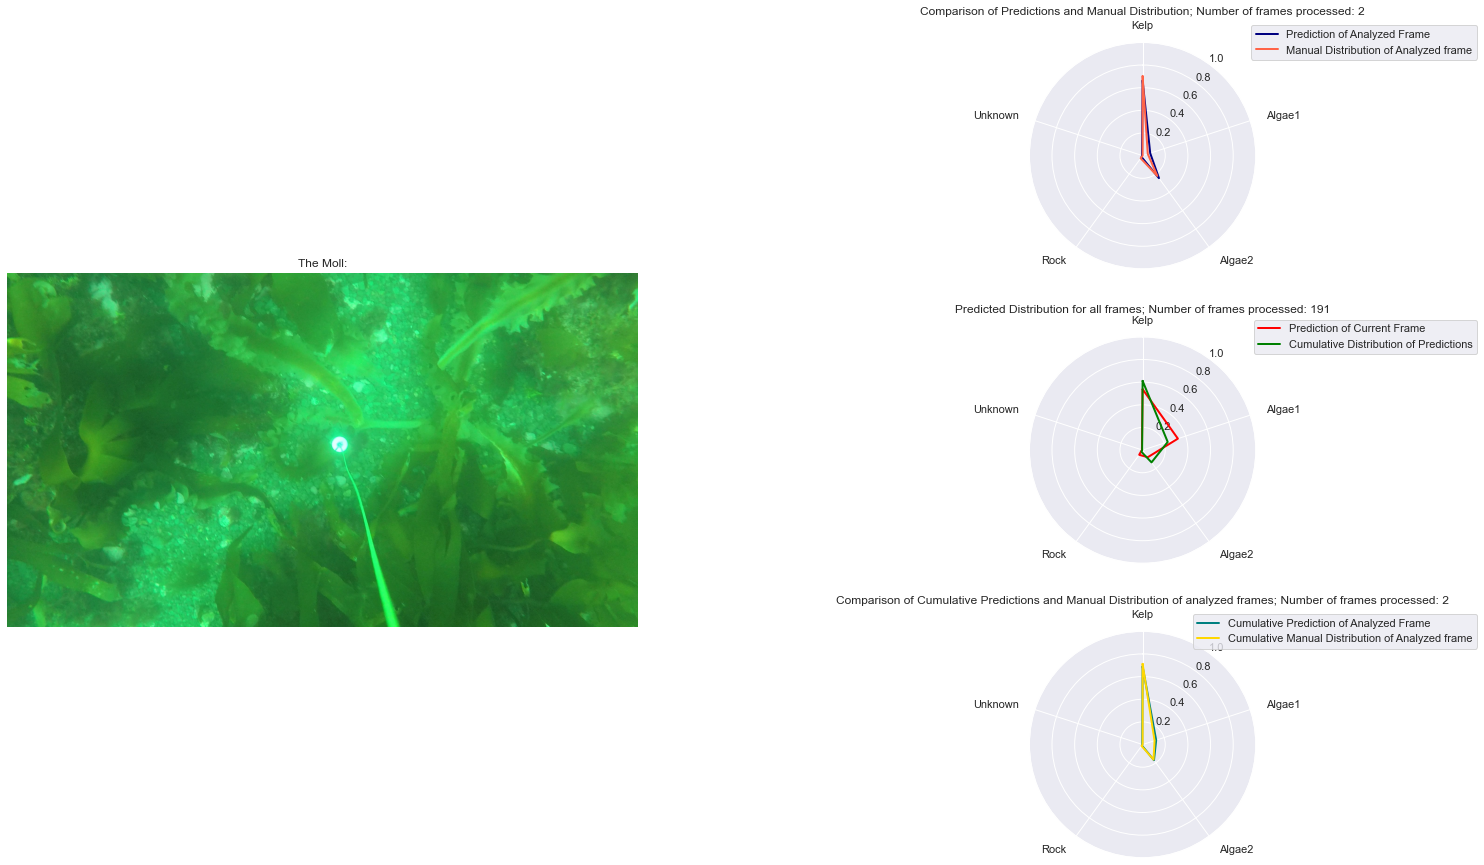

In [59]:
from PIL import Image

f1 = plt.figure(figsize=(26,15))
# plt.rcParams["figure.autolayout"] = False

labels = ['Kelp', 'Algae1', 'Algae2', 'Rock', 'Unknown']
num_vars = len(labels)
angle = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles = angle + angle[:1]

X_axis = np.arange(len(labels))
ax_2 = f1.add_subplot(3,2,2, projection="polar")
ax_2.set_theta_offset(np.pi / 2)
ax_2.set_theta_direction(-1)
ax_2.set_thetagrids(np.degrees(angle), labels)
for label, ang in zip(ax_2.get_xticklabels(), angles):
    if ang in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < ang < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
ax_2.set_ylim(0, 1)
ax_2.set_rlabel_position(180 / num_vars)
ax_2.set_title('Comparison of Predictions and Manual Distribution')

ax_4 = f1.add_subplot(3,2,4, projection="polar")
ax_4.set_ylim(0, 1)
ax_4.set_rlabel_position(180 / num_vars)

ax_6 = f1.add_subplot(3,2,6, projection="polar")
ax_6.set_theta_offset(np.pi / 2)
ax_6.set_theta_direction(-1)
ax_6.set_thetagrids(np.degrees(angle), labels)
for label, ang in zip(ax_6.get_xticklabels(), angles):
    if ang in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < ang < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
ax_6.set_ylim(0, 1)
ax_6.set_rlabel_position(180 / num_vars)
ax_6.set_title('Comparison of Cumulative Predictions and Manual Distribution of analyzed frames')

ax_1 = f1.add_subplot(1,2,1)

plt.subplots_adjust(wspace= 0.30, hspace= 0.30)
f1.canvas.draw()

sum_cumul = [0.0,0.0,0.0,0.0,0.0]
sum_cumul_analyzed = [0.0,0.0,0.0,0.0,0.0]
sum_cumul_manual = [0.0,0.0,0.0,0.0,0.0]
count=0
video_name = 'radialgraph2.avi'
video = cv2.VideoWriter(video_name, 0, 5.0, (1872, 1080))
sns.set()
for ind, (i,j,o) in enumerate(zip(test_image, test_labels, orig)):

    X1 = np.array(i, dtype='float32')
    y = np.array(j, dtype='float32')
    X = X1 / 255.0

    classes = np.array(['Kelp', 'Algae1', 'Algae2', 'Rock', 'Unknown'])
    proba = model.predict(X.reshape(1, 152, 270, 3))
    pred = list(proba[0])
    list1 = [pred, sum_cumul]
    sum_cumul = [round(sum(k),3) for k in zip(*list1)]
    cumul = [round(l/(ind+1), 3) for l in sum_cumul]

    list2 = [j, sum_cumul_manual]
    # o = cv2.resize(o, (1600, 1200))

    ax_1.clear()
    ax_1.axis('off')
    ax_1.set_title('The Moll:')
    ax_1.imshow(o)


    ax_4.clear()
    pred += pred[:1]
    cumul += cumul[:1]
    print('Cumul', cumul)
    ax_4.plot(angles, pred, color='red', linewidth=2, label='Prediction of Current Frame')
    ax_4.plot(angles, cumul, color='green', linewidth=2, label='Cumulative Distribution of Predictions')
    ax_4.set_theta_offset(np.pi / 2)
    ax_4.set_theta_direction(-1)
    ax_4.set_thetagrids(np.degrees(angle), labels)
    for label, ang in zip(ax_4.get_xticklabels(), angles):
        if ang in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < ang < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
    ax_4.set_ylim(0, 1)
    ax_4.set_rlabel_position(180 / num_vars)
    frames = ind + 1
    ax_4.legend(loc='upper right', bbox_to_anchor=(2, 1.1))
    ax_4.set_title('Predicted Distribution for all frames; Number of frames processed: '+str(frames), y=1.08)

    if(j!=0):
        count+=1

        proba2 = model.predict(X.reshape(1, 152, 270, 3))
        pred_analyzed = list(proba2[0])

        ax_2.clear()
        pred_analyzed += pred_analyzed[:1]
        print(j)
        j += j[:1]
        print(pred_analyzed, j)
        ax_2.plot(angles, pred_analyzed, color='navy', linewidth=2, label='Prediction of Analyzed Frame')
        ax_2.plot(angles, j, color='tomato', linewidth=2, label='Manual Distribution of Analyzed frame')
        ax_2.set_theta_offset(np.pi / 2)
        ax_2.set_theta_direction(-1)
        ax_2.set_thetagrids(np.degrees(angle), labels)
        for label, ang in zip(ax_2.get_xticklabels(), angles):
            if ang in (0, np.pi):
                label.set_horizontalalignment('center')
            elif 0 < ang < np.pi:
                label.set_horizontalalignment('left')
            else:
                label.set_horizontalalignment('right')
        ax_2.set_ylim(0, 1)
        ax_2.set_rlabel_position(180 / num_vars)
        ax_2.legend(loc='upper right', bbox_to_anchor=(2, 1.1))
        ax_2.set_title('Comparison of Predictions and Manual Distribution; Number of frames processed: '+str(count))

        list3 = [pred_analyzed, sum_cumul_analyzed]
        sum_cumul_analyzed = [round(sum(o),3) for o in zip(*list3)]
        cumul_analyzed = [round(p/count, 3) for p in sum_cumul_analyzed]


        sum_cumul_manual = [round(sum(m),3) for m in zip(*list2)]
        cumul_manual = [round(n/count, 3) for n in sum_cumul_manual]

        ax_6.clear()
        cumul_analyzed += cumul_analyzed[:1]
        cumul_manual += cumul_manual[:1]
        ax_6.plot(angles, cumul_analyzed, color='teal', linewidth=2, label='Cumulative Prediction of Analyzed Frame')
        ax_6.plot(angles, cumul_manual, color='gold', linewidth=2, label='Cumulative Manual Distribution of Analyzed frame')
        ax_6.set_theta_offset(np.pi / 2)
        ax_6.set_theta_direction(-1)
        ax_6.set_thetagrids(np.degrees(angle), labels)
        for label, ang in zip(ax_6.get_xticklabels(), angles):
            if ang in (0, np.pi):
                label.set_horizontalalignment('center')
            elif 0 < ang < np.pi:
                label.set_horizontalalignment('left')
            else:
                label.set_horizontalalignment('right')
        ax_6.set_ylim(0, 1)
        ax_6.set_rlabel_position(180 / num_vars)
        ax_6.legend(loc='upper right', bbox_to_anchor=(2, 1.1))
        ax_6.set_title('Comparison of Cumulative Predictions and Manual Distribution of analyzed frames; Number of frames processed: '+str(count))

    f1.canvas.draw()
    img = np.frombuffer(f1.canvas.tostring_rgb(), dtype=np.uint8)
    img  = img.reshape(f1.canvas.get_width_height()[::-1] + (3,))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

    print(img.shape)

    # im_tile_resize = np.vstack((X,img))
    # cv2.imshow('image', X)
    cv2.imshow('frames', img)

    # img_ = Image.fromarray(img)
    video.write(img)



    k = cv2.waitKey(33) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
video.release()

Bar Chart Template

1/1 [==============================] - 0s 41ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 54ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 58ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 58ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 45ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 33ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 35ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 46ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 39ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 48ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 26ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 30ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 38ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 47ms/step
(720, 1872, 3)
1/1 [==============================] - 0s 28ms/step
(720, 1872

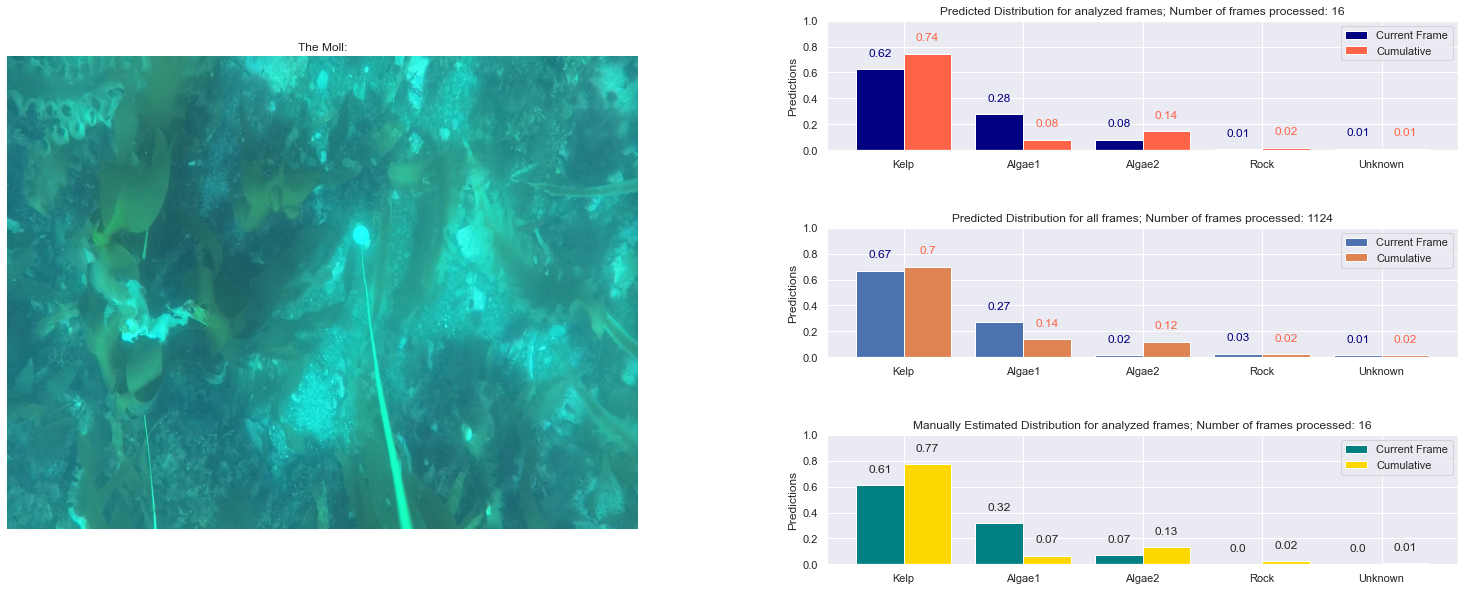

In [61]:
from PIL import Image

f1 = plt.figure(figsize=(26, 10))
# plt.rcParams["figure.autolayout"] = False

xax = ['Kelp', 'Algae1', 'Algae2', 'Rock', 'Unknown']
X_axis = np.arange(len(xax))

left = 0.08
width = 0.9
bottom  = 0.05
height = 0.6
right = left + width
top = bottom + height



ax_2 = f1.add_subplot(3,2,2)
ax_2.set_xticks([y for y in range(5)], labels=xax)
ax_2.set_ylabel('Predictions')
ax_2.set_title('Predicted Distribution for analyzed frames')



ax_4 = f1.add_subplot(3,2,4)
ax_4.set_xticks([y for y in range(5)], labels=xax)
ax_4.set_ylabel('Predictions')
ax_4.set_title('Predicted Distribution for all frames')

ax_6 = f1.add_subplot(3,2,6)
ax_6.set_xticks([y for y in range(5)], labels=xax)
ax_6.set_ylabel('Predictions')
ax_6.set_title('Manually Estimated Distribution for analyzed frames')

ax_1 = f1.add_subplot(1,2,1)

plt.subplots_adjust(wspace= 0.30, hspace= 0.60)
f1.canvas.draw()
# f1 = plt.figure()
# plt.subplot(1, 2, 1)
# line1, = plt.plot(a)
# plt.subplot(1, 2, 2)
# line2, = plt.plot(a)
sum_cumul = [0.0,0.0,0.0,0.0,0.0]
sum_cumul_analyzed = [0.0,0.0,0.0,0.0,0.0]
sum_cumul_manual = [0.0,0.0,0.0,0.0,0.0]
count=0
video_name = 'mygeneratedvideo.avi'
video = cv2.VideoWriter(video_name, 0, 5.0, (1872, 720))
sns.set()
for ind, (i,j,o) in enumerate(zip(test_image, test_labels, orig)):
    X1 = np.array(i, dtype='float32')
    y = np.array(j, dtype='float32')
    X = X1 / 255.0

    classes = np.array(['Kelp', 'Algae1', 'Algae2', 'Rock', 'Unknown'])
    proba = model.predict(X.reshape(1, 152, 270, 3))
    pred = list(proba[0])
    list1 = [pred, sum_cumul]
    sum_cumul = [round(sum(k),3) for k in zip(*list1)]
    cumul = [round(l/(ind+1), 3) for l in sum_cumul]

    o = cv2.resize(o, (1600, 1200))

    ax_1.clear()
    ax_1.axis('off')
    ax_1.set_title('The Moll:')
    ax_1.imshow(o)


    ax_4.clear()
    ax_4.bar(X_axis-0.2, pred, 0.4, label='Current Frame')
    ax_4.bar(X_axis+0.2, cumul, 0.4, label='Cumulative')
    ax_4.set_xticks([y for y in range(5)], labels=xax)
    ax_4.set_ylabel('Predictions')
    ax_4.set_ylim([0,1])
    ax_4.legend(loc='upper right')
    frames = ind + 1
    ax_4.set_title('Predicted Distribution for all frames; Number of frames processed: '+str(frames))
    for r,v1,v2 in zip(X_axis,pred, cumul):
        ax_4.text(r-0.2, v1+0.1, str(round(v1, 2)), horizontalalignment='center', color='navy')
        ax_4.text(r+0.2, v2+0.1, str(round(v2,2)), horizontalalignment='center', color='tomato')

    # ax_4.text(right, top, 'Number of frames processed: '+str(frames),
    #     horizontalalignment='right',
    #     verticalalignment='top',
    #     color='g',size=10,
    #     transform=ax_4.transAxes)

    if(j!=0):
        count+=1

        proba2 = model.predict(X.reshape(1, 152, 270, 3))
        pred_analyzed = list(proba2[0])
        list3 = [pred_analyzed, sum_cumul_analyzed]
        sum_cumul_analyzed = [round(sum(o),3) for o in zip(*list3)]
        cumul_analyzed = [round(p/count, 3) for p in sum_cumul_analyzed]
        ax_2.clear()
        ax_2.bar(X_axis-0.2, pred_analyzed, 0.4, label='Current Frame', color='navy')
        ax_2.bar(X_axis+0.2, cumul_analyzed, 0.4, label='Cumulative', color='tomato')
        ax_2.set_xticks([y for y in range(len(pred_analyzed))], labels=xax)
        ax_2.set_ylim([0,1])
        ax_2.set_ylabel('Predictions')
        ax_2.legend(loc='upper right')
        ax_2.set_title('Predicted Distribution for analyzed frames; Number of frames processed: '+str(count))
        for r2,v_1,v_2 in zip(X_axis,pred_analyzed, cumul_analyzed):
            ax_2.text(r2-0.2, v_1+0.1, str(round(v_1, 2)), horizontalalignment='center', color='navy')
            ax_2.text(r2+0.2, v_2+0.1, str(round(v_2, 2)), horizontalalignment='center', color='tomato')

        list2 = [j, sum_cumul_manual]
        sum_cumul_manual = [round(sum(m),3) for m in zip(*list2)]
        cumul_manual = [round(n/count, 3) for n in sum_cumul_manual]
        ax_6.clear()
        ax_6.bar(X_axis-0.2, j, 0.4, label='Current Frame', color='teal')
        ax_6.bar(X_axis+0.2, cumul_manual, 0.4, label='Cumulative', color='gold')
        ax_6.set_xticks([y for y in range(len(j))], labels=xax)
        ax_6.set_ylim([0,1])
        ax_6.set_ylabel('Predictions')
        ax_6.legend(loc='upper right')
        ax_6.set_title('Manually Estimated Distribution for analyzed frames; Number of frames processed: '+str(count))
        for r3,v1_,v2_ in zip(X_axis,j, cumul_manual):
            ax_6.text(r3-0.2, v1_+0.1, str(round(v1_, 2)), horizontalalignment='center')
            ax_6.text(r3+0.2, v2_+0.1, str(round(v2_,2)), horizontalalignment='center')
    f1.canvas.draw()
    img = np.frombuffer(f1.canvas.tostring_rgb(), dtype=np.uint8)
    img  = img.reshape(f1.canvas.get_width_height()[::-1] + (3,))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

    print(img.shape)

    # im_tile_resize = np.vstack((X,img))
    # cv2.imshow('image', X)
    cv2.imshow('frames', img)

    # img_ = Image.fromarray(img)
    video.write(img)



    k = cv2.waitKey(33) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
video.release()